# Лабораторная работа №1

## Задание

* Найдите временной ряд с ценами активов (цены акций, облигаций, нефти, криптовалюты и т.д.)
* Отобразите временной ряд на графике
* Оцените его
* Сделайте начальные выводы
* Постройте 4 скользящие средние с окнами (5, 10, 30, 50)
* Оцените график с скоьзящими среднмии
* Сделайте предыдыдущие 2 пункта с экспоненциальными скользящими средними
* Сделайте прогноз движения актива на основе экспоненциального скользящего среднего на 5 периодов вперед.
* Сделайте выводы по проделанной работе и опипшите их.

## Ход работы

In [ ]:
!pip install yfinance matplotlib pandas numpy

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Функция для загрузки данных с yahoo.finance
def load_data(symbol, start_date, end_date):
    data = yf.download(symbol, start=start_date, end=end_date)
    return data['Close']

# Функция для прогноза экспоненциальными скользящими средними
def predict_ema(data, periods=5):
    ema = data.ewm(span=30, adjust=False).mean()
    last_ema = ema.iloc[-1]
    
    last_date = data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=periods)
    
    if len(ema) > 1:
        growth_rate = (ema.iloc[-1] / ema.iloc[-2]) -1
    else:
        growth_rate = 0
    
    future_ema = [last_ema * (1 + growth_rate)**i for i in range(1, periods + 1)]
    
    return future_dates, future_ema

Загружаем временной ряд с ценами монеты DOGE

In [4]:
doge_usd = load_data('ETH-USD', '2021-12-02', '2024-12-02')

[*********************100%***********************]  1 of 1 completed


Выводим временной ряд

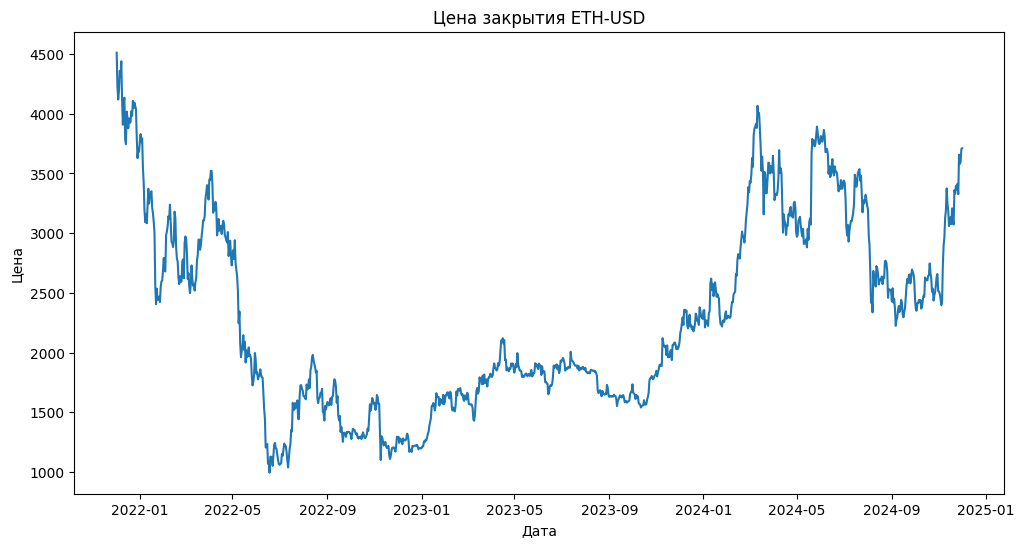

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(doge_usd)
plt.title('Цена закрытия ETH-USD')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.show()

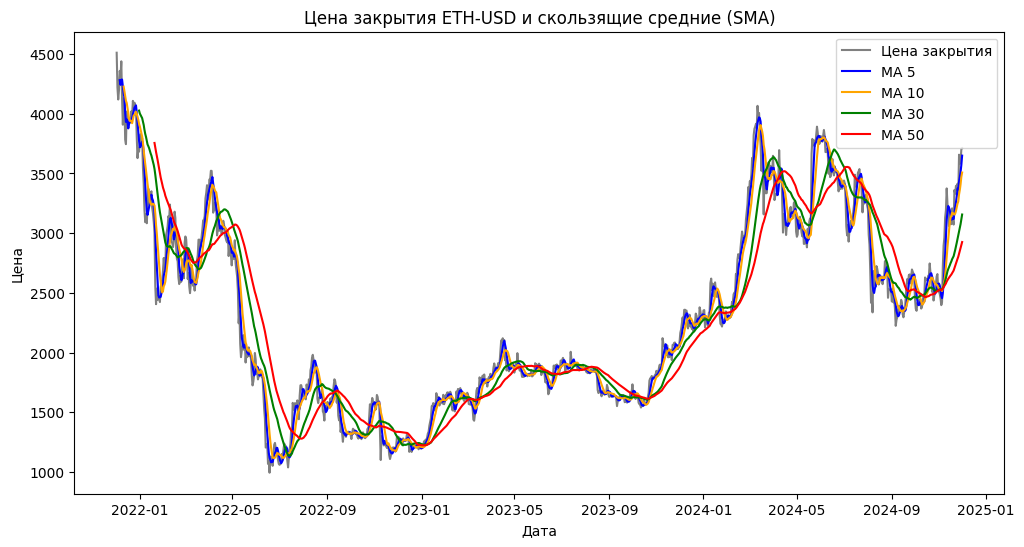

In [6]:
ma5 = doge_usd.rolling(window=5).mean()
ma10 = doge_usd.rolling(window=10).mean()
ma30 = doge_usd.rolling(window=30).mean()
ma50 = doge_usd.rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(doge_usd, label='Цена закрытия', color='grey')
plt.plot(ma5, label='MA 5', color='blue')
plt.plot(ma10, label='MA 10', color='orange')
plt.plot(ma30, label='MA 30', color='green')
plt.plot(ma50, label='MA 50', color='red')

plt.title('Цена закрытия ETH-USD и скользящие средние (SMA)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

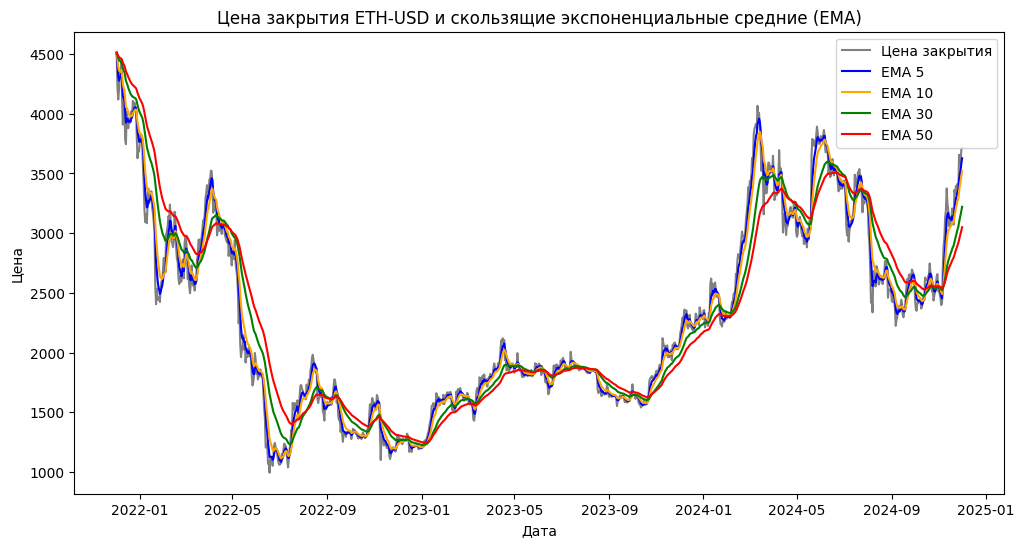

In [7]:
ema5 = doge_usd.ewm(span=5, adjust=False).mean()
ema10 = doge_usd.ewm(span=10, adjust=False).mean()
ema30 = doge_usd.ewm(span=30, adjust=False).mean()
ema50 = doge_usd.ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(doge_usd, label='Цена закрытия', color='gray')
plt.plot(ema5, label='EMA 5', color='blue')
plt.plot(ema10, label='EMA 10', color='orange')
plt.plot(ema30, label='EMA 30', color='green')
plt.plot(ema50, label='EMA 50', color='red')

plt.title('Цена закрытия ETH-USD и скользящие экспоненциальные средние (EMA)')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.show()

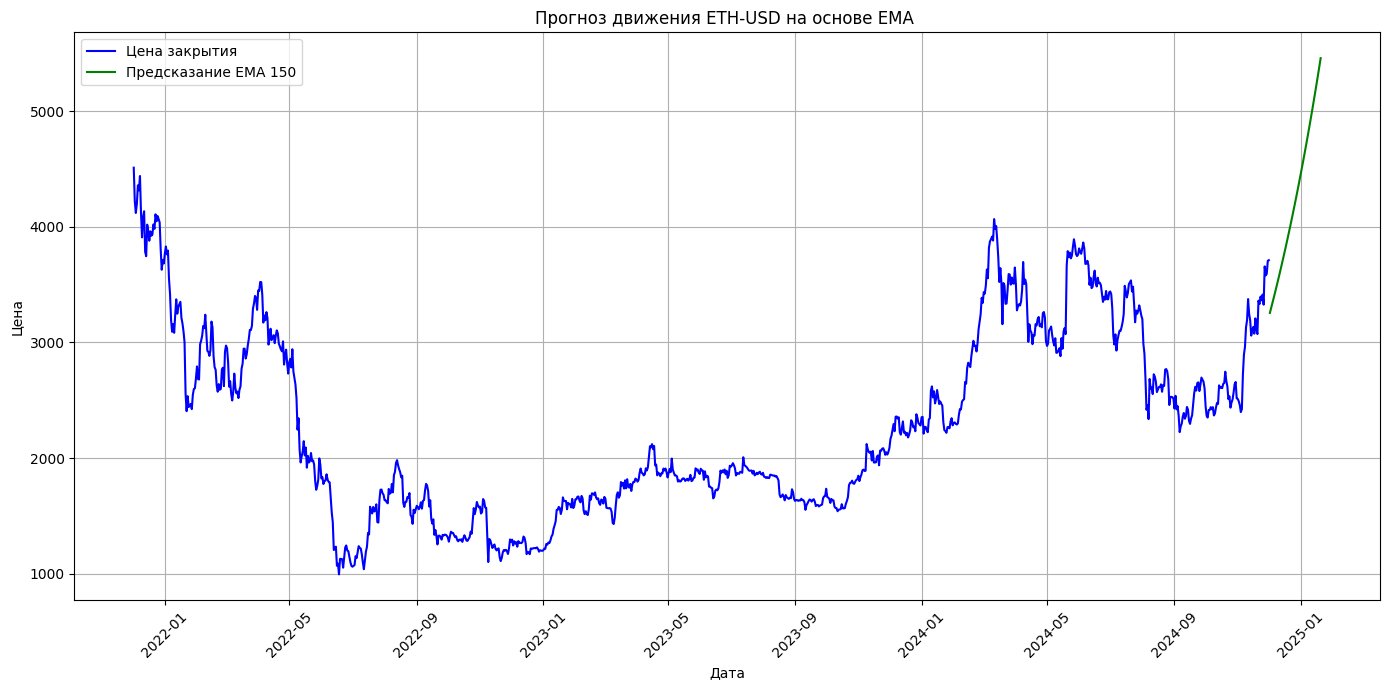

In [8]:
future_dates, future_ema = predict_ema(doge_usd, 50)

plt.figure(figsize=(14, 7))
plt.plot(doge_usd.index, doge_usd.values, label='Цена закрытия', color='blue')
plt.plot(future_dates, future_ema, label='Предсказание EMA 150', color='green')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('Прогноз движения ETH-USD на основе EMA ')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Вывод